<a href="https://colab.research.google.com/github/Daniil-Khlyvniuk/neural-networks/blob/main/keras__number_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.datasets import mnist
import time

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [8]:
model = keras.models.Sequential([
    Flatten(input_shape=(28,28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
log = model.fit(x_train, y_train_cat, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2864 - accuracy: 0.9170 - val_loss: 0.1521 - val_accuracy: 0.9554
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1243 - accuracy: 0.9635 - val_loss: 0.1145 - val_accuracy: 0.9664
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0849 - accuracy: 0.9748 - val_loss: 0.1029 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0877 - val_accuracy: 0.9740
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0476 - accuracy: 0.9855 - val_loss: 0.0842 - val_accuracy: 0.9747


First 10 fase detections: 
 


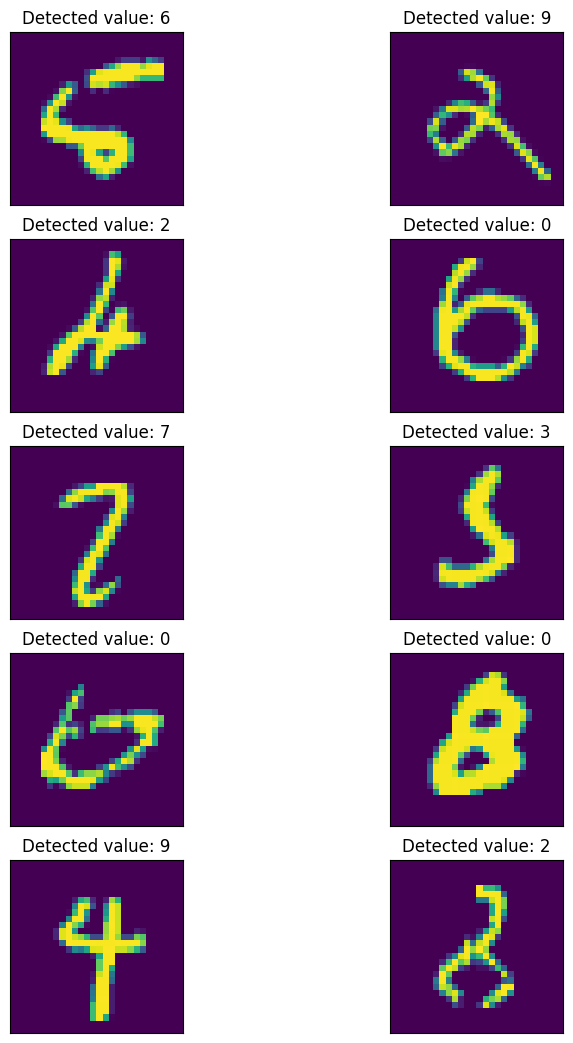

In [24]:
pred = model.predict(x_test, verbose=0)
pred = np.argmax(pred, axis=1)


mask = y_test == pred

x_false = x_test[~mask]
p_false = pred[~mask]


# for i in range(4):
#   plt.imshow()
#   print(f'Detected value: {str(p_false[i])}')


w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
columns = 2
rows = 5
ax = []

for i in range(10):
    img = x_false[i]
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title( f'Detected value: {str(p_false[i])}' )
    ax[-1].set_xticks([])
    ax[-1].set_yticks([])

    plt.imshow(img)

print("First 10 fase detections: \n ")
plt.show()